# Slope Fields
Code to render slope field

**To evalute cells, type shift + enter.**

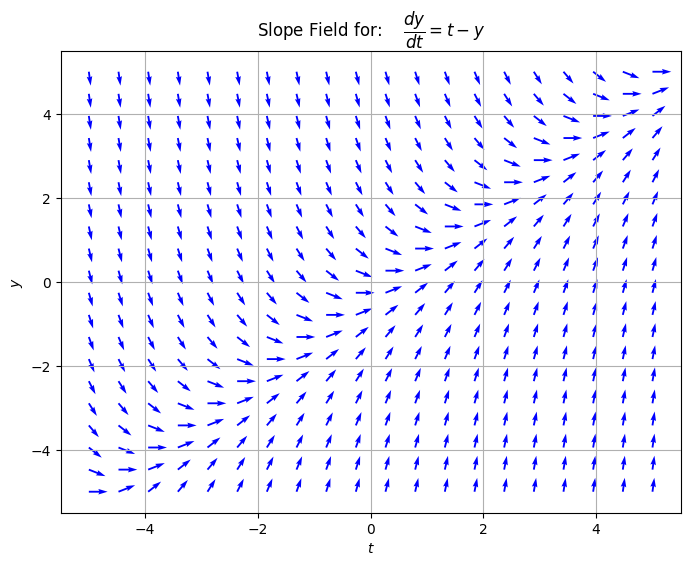

In [ ]:
# Define the differential equation
def dydt(t, y):
    return

# Create a grid of t and y values
t     = np.linspace(-5, 5, 20)
y     = np.linspace(-5, 5, 20)
[T,Y] = np.meshgrid(t, y)

# Calculate the slopes at each point defined by dy/dt = f(t,y)
slopes = dydx(T, Y)

# Normalize the vectors to have uniform length
dt = np.ones(slopes.shape)
dy = slopes
# Normalize the vectors
magnitude = np.sqrt(dt**2 + dy**2)
dt_norm = dt / magnitude
dy_norm = dy / magnitude

plt.figure(figsize=(8, 6))
plt.quiver(T, Y, dt_norm, dy_norm, angles='xy', scale_units='xy', scale=3, color='blue')
plt.xlabel(r'$t$')
plt.ylabel(r'$y$')
plt.title(r'Slope Field for: $\quad \dfrac{dy}{dt} = t - y$')
plt.grid(True)
plt.show()


# Euler's Method
Python code below performs Euler's Method.

**To evalute cells, type shift + enter.**

In [ ]:
# importing libraries
import numpy as np
import math
from matplotlib import pyplot as plt
from ipywidgets import interactive, fixed

In [ ]:
# Euler's Method routine for solving Initial Value Problems (IVPs)
# Use with ydot.m to evaluate rhs of differential equation
# Input: interval inter, initial value y0, number of steps n
# Output: time steps t, approximate solution w
# Usage: euler(a,b,y_0,n)
# Example: euler(0,1,1,10)
def euler(a,b,y0,n):

    # initialize/define
    t    = np.zeros(n+1) # independent var
    w    = np.zeros(n+1) # dependent var
    h    =               # step size
    w[0] =               # initial condition

    for i in range(1,n+1):
        t[i] = t[i-1] + h
        w[i] = w[i-1] + h*
    return t,w

# RHS of Differential Equation
def f(t,y):
    ydot =
    return ydot


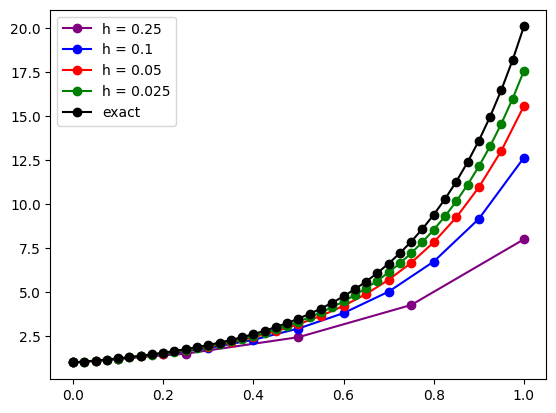

In [ ]:
# evaluation of euler's method for decreasing values of step size h
# and corresponding plots.
[t,w]   = euler(a,b,y0,n)

plt.plot(t4,w4,'-o',color='purple',label = "h = 0.25")
plt.plot(t10,w10,'-o',color='blue',label = "h = 0.1")

y_exact =
plt.plot(t40,y,'-o',color='black',label = "exact")
plt.legend()

Text(0, 0.5, '$|y(b) - w_{n}|$ (error)')

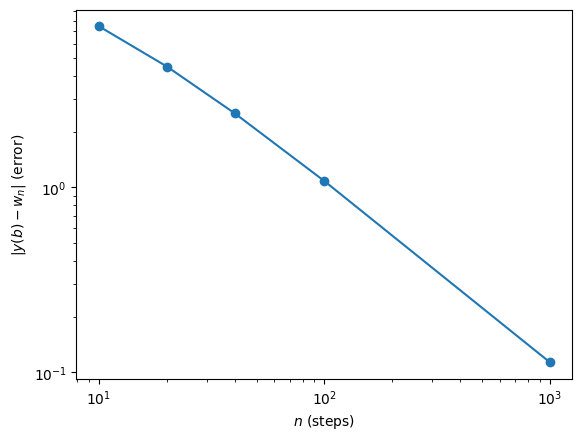

In [ ]:
# Error e at t = b for decreasing (increasing) h (n).
w1 = [w10[-1], w20[-1], w40[-1], w100[-1], w1000[-1]]
e = np.abs(y[-1] - w1)
n = [10,20,40,100,1000]
p = plt.loglog(n,e,'-o')
plt.xlabel(r'$n$ (steps)')
plt.ylabel(r'$|y(b) - w_{n}|$ (error)')


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def slope_field(f, tmin=-2, tmax=2, ymin=-3, ymax=3, density=21):
    t = np.linspace(tmin, tmax, density)
    y = np.linspace(ymin, ymax, density)
    T, Y = np.meshgrid(t, y)

    dY = f(T, Y)
    dT = np.ones_like(dY)

    # normalize so arrows are similar length
    M = np.sqrt(dT**2 + dY**2)
    dT = dT / M
    dY = dY / M

    plt.figure(figsize=(7,5))
    plt.quiver(T, Y, dT, dY, angles="xy")
    plt.xlim(tmin, tmax)
    plt.ylim(ymin, ymax)
    plt.xlabel("t")
    plt.ylabel("y")
    plt.grid(True)

def plot_solutions(t, curves, labels):
    for yvals, lab in zip(curves, labels):
        plt.plot(t, yvals, label=lab)
    plt.legend()


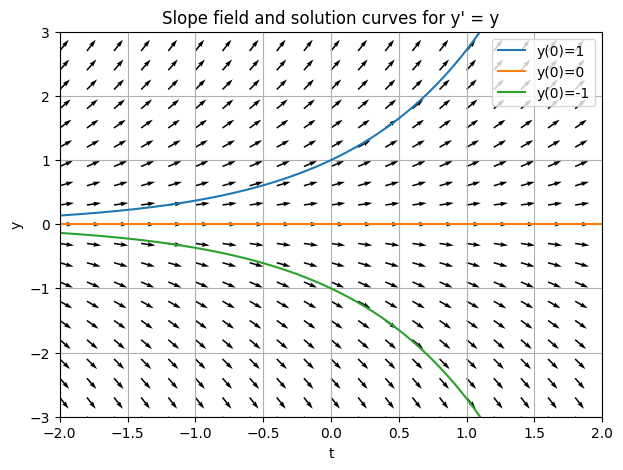

In [2]:
f = lambda t, y: y
slope_field(f)

t = np.linspace(-2, 2, 400)
curves = [np.exp(t), np.zeros_like(t), -np.exp(t)]
labels = ["y(0)=1", "y(0)=0", "y(0)=-1"]
plot_solutions(t, curves, labels)

plt.title("Slope field and solution curves for y' = y")
plt.show()


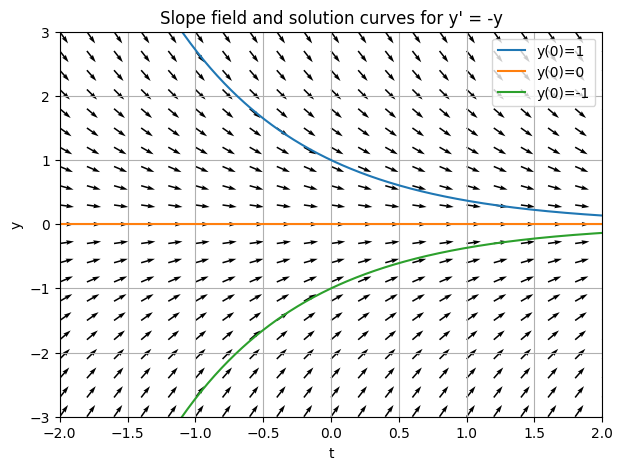

In [3]:
f = lambda t, y: -y
slope_field(f)

t = np.linspace(-2, 2, 400)
curves = [np.exp(-t), np.zeros_like(t), -np.exp(-t)]
labels = ["y(0)=1", "y(0)=0", "y(0)=-1"]
plot_solutions(t, curves, labels)

plt.title("Slope field and solution curves for y' = -y")
plt.show()


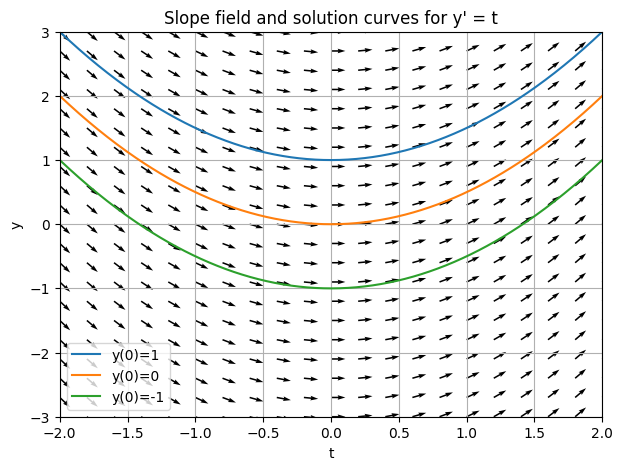

In [4]:
f = lambda t, y: t
slope_field(f)

t = np.linspace(-2, 2, 400)
curves = [1 + 0.5*t**2, 0.5*t**2, -1 + 0.5*t**2]
labels = ["y(0)=1", "y(0)=0", "y(0)=-1"]
plot_solutions(t, curves, labels)

plt.title("Slope field and solution curves for y' = t")
plt.show()


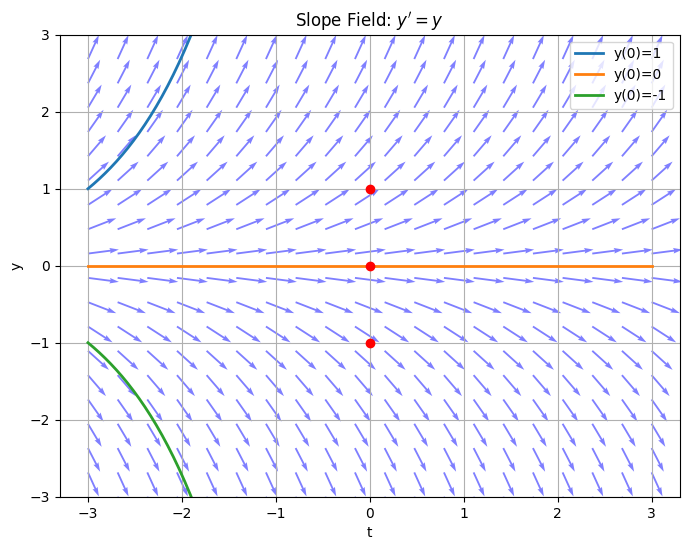

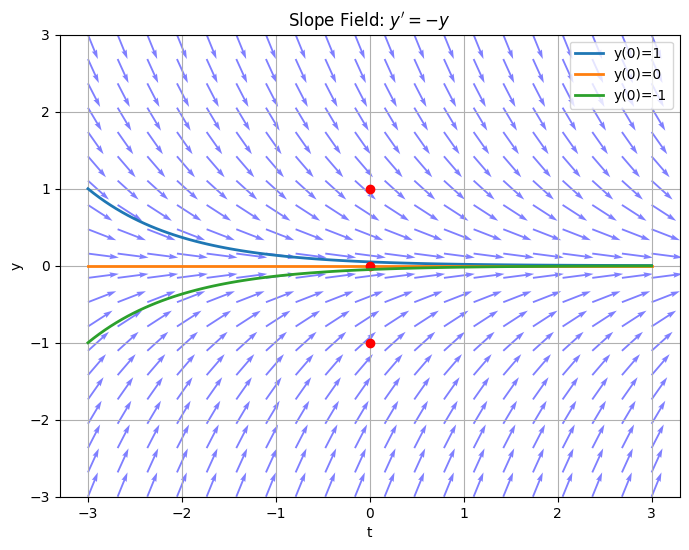

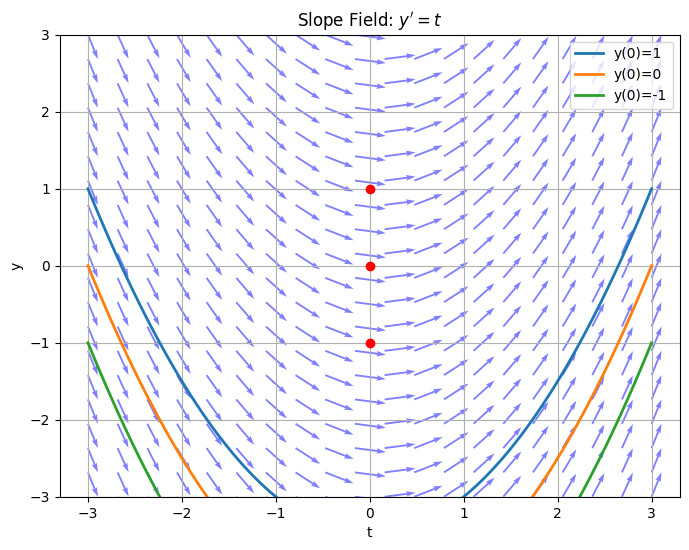

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the three differential equations
def diff_eq_a(y, t):
    return y

def diff_eq_b(y, t):
    return -y

def diff_eq_c(y, t):
    return t

# List of equations and titles for looping
equations = [
    (diff_eq_a, r"Slope Field: $y' = y$"),
    (diff_eq_b, r"Slope Field: $y' = -y$"),
    (diff_eq_c, r"Slope Field: $y' = t$")
]

# Set up the grid for the slope field
t = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
T, Y = np.meshgrid(t, y)

# Initial conditions to sketch
y0_values = [1, 0, -1]
t_span = np.linspace(-3, 3, 100)

# Loop through each equation to generate a plot
for func, title in equations:
    plt.figure(figsize=(8, 6))

    # 1. Calculate Slopes for the Vector Field
    # Note: Our meshgrid is (T, Y).
    # For (a) and (b), slope depends on Y. For (c), slope depends on T.
    if "y' = y" in title:
        dydt = Y
    elif "y' = -y" in title:
        dydt = -Y
    else: # y' = t
        dydt = T

    # Normalize arrows so they are all the same length
    dt = np.ones(dydt.shape)
    norm = np.sqrt(dt**2 + dydt**2)
    dt_norm = dt / norm
    dy_norm = dydt / norm

    # Plot the Quiver (Slope Field)
    plt.quiver(T, Y, dt_norm, dy_norm, angles='xy', scale_units='xy', scale=3, color='blue', alpha=0.5)

    # 2. Sketch Solution Curves
    # We solve the ODE for each initial condition
    for y0 in y0_values:
        # Solve ODE
        sol = odeint(func, y0, t_span)

        # Plot the curve
        label = f"y(0)={y0}"
        plt.plot(t_span, sol, linewidth=2, label=label)

        # Plot the starting dot
        plt.plot(0, y0, 'ro')

    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.ylim(-3, 3)
    plt.legend()
    plt.show()